In [1]:
!mq ls

id       folder name                 res.         age state   time error
-------- ------ -------------------- ----- ---------- ------ ----- -------------
13452780 ./     BN_gs.py             16:1h 2:05:09:18 FAILED  0:24 [n-62-28-28:1
13453332 ./     BN_gs.py             16:1h 2:03:49:10 done    0:41 
13453495 ./     convergence_check.py 16:4h 2:03:22:36 FAILED  0:14 [n-62-28-28:2
13453501 ./     convergence_check.py 16:4h 2:03:21:00 done    4:53 
13453580 ./     convergence_check.py 16:1h 2:03:07:03 done   12:20 
13511532 ./     convergence_check.py 16:4h    4:28:19 FAILED  6:32 [n-62-28-30:0
13516959 ./     convergence_check.py 16:2h       2:42 queued  0:00 
-------- ------ -------------------- ----- ---------- ------ ----- -------------
FAILED: 3, done: 3, queued: 1, total: 7


In [2]:
from ase.io import read
from gpaw import GPAW, PW, FermiDirac
import numpy as np
import matplotlib.pyplot as plt

In [4]:
formula = 'BN'
out_dir = './out/'

In [6]:
ecuts = [ecut for ecut in range(100, 1100, 100)]
E = np.zeros(len(ecuts))

for i, ecut in enumerate(ecuts):
    name='ecut=' + str(ecut) + '_' + formula + '_gs_out'
    calc = GPAW(out_dir + name + '.gpw', txt=None)
    atoms = calc.get_atoms()
    E[i] = atoms.get_potential_energy()

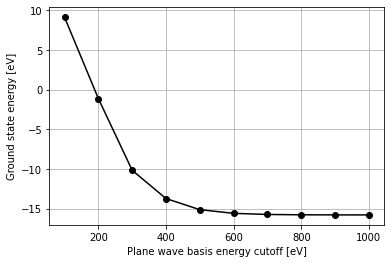

In [7]:
plt.plot(np.array(ecuts), E, 'ko-')
plt.ylabel(r'Ground state energy [eV]')
plt.xlabel(r'Plane wave basis energy cutoff [eV]')
plt.grid()
plt.savefig('./plots/ecut_gs_convergence.pdf')
plt.savefig('./plots/ecut_gs_convergence.png')
plt.show()

In [9]:
formula = 'BN'
no_kptss = [no_kpts for no_kpts in range(10,100,10)]
E_k = np.zeros(len(no_kptss))

for i, no_kpts in enumerate(no_kptss):
    name='no_kpts=' + str(no_kpts) + '_' + formula + '_gs_out'
    calc = GPAW(out_dir + name + '.gpw', txt=None)
    atoms = calc.get_atoms()
    E_k[i] = atoms.get_potential_energy()

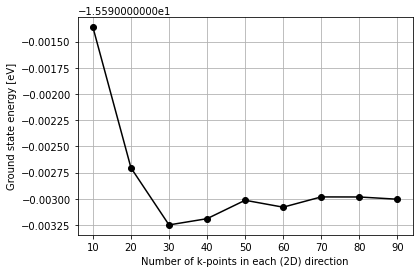

In [11]:
plt.plot(np.array(no_kptss), E_k, 'ko-')
plt.ylabel(r'Ground state energy [eV]')
plt.xlabel(r'Number of k-points in each (2D) direction')
plt.grid()
plt.savefig('./plots/no_kpts_gs_convergence.pdf')
plt.savefig('./plots/no_kpts_gs_convergence.png')
plt.show()

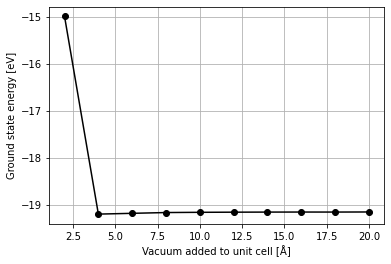

In [14]:
vacs = [vac for vac in range(2,6,2)]
E_vac = np.zeros(len(vacs))

for i, vac in enumerate(vacs):
    name='vac=' + str(vac) + '_' + formula + '_gs_out'
    calc = GPAW(out_dir + name + '.gpw', txt=None)
    atoms = calc.get_atoms()
    E_vac[i] = atoms.get_potential_energy()

plt.plot(np.array(vacs), E_vac, 'ko-')
plt.ylabel(r'Ground state energy [eV]')
plt.xlabel(r'Vacuum added to unit cell [Å]')
plt.grid()
plt.savefig('./plots/vac_gs_convergence.pdf')
plt.show()

In [ ]:
# xcs = ['LDA', 'PBE', 'RPBE']
# E_xc = np.zeros(len(xcs))

# for i, xc in enumerate(xcs):
#     name='xc=' + str(xc) + '_' + formula + '_gs_out'
#     calc = GPAW(name + '.gpw', txt=None)
#     atoms = calc.get_atoms()
#     E_vac[i] = atoms.get_potential_energy()

# plt.bar(np.array(xcs), E_xc, 'ko-')
# plt.ylabel(r'Ground state energy [eV]')
# plt.xlabel(r'Excange correllation functional')
# plt.grid()
# plt.savefig('./plots/xc_gs_convergence.pdf')
# plt.show()

In [ ]:
Tes = [Te for Tes in range(0, 0.1, 0.01)]
E_Te = np.zeros(len(Tes))

for i, Te in enumerate(Tes):
    name='Te=' + str(Te) + '_' + formula + '_gs_out'
    calc = GPAW(name + '.gpw', txt=None)
    atoms = calc.get_atoms()
    E_Te[i] = atoms.get_potential_energy()

plt.plot(np.array(Tes), E_Te, 'ko-')
plt.ylabel(r'Ground state energy [eV]')
plt.xlabel(r'Electron temperature [eV]')
plt.grid()
plt.savefig('./plots/T_e_gs_convergence.pdf')
plt.show()

In [ ]:
from gpaw import GPAW

calc = GPAW('Al-fcc.gpw', txt=None)

bulk = calc.get_atoms()

print(bulk.get_potential_energy())
-4.12234332252

density = calc.get_pseudo_density()

density.shape
(9, 9, 9)

density.max()
0.42718359271458561

from mayavi import mlab

mlab.contour3d(density)
<mayavi.modules.iso_surface.IsoSurface object at 0x7f1194491110>

mlab.show()